# Analyzing Fitness and Body Composition: Insights from Gym Members' Exercise Tracking Data


# 1. Introduction

This analysis explores a dataset of gym members' exercise tracking data to gain insights into the relationship between various health and fitness metrics. The primary goals are to understand members' demographic and workout patterns, identify key predictors of body composition, and assess the statistical significance of experience levels in predicting fat percentage.

### Purpose
With an increasing focus on health and fitness, understanding the factors that influence body composition, exercise performance, and general well-being can guide personal training recommendations, enhance fitness programs, and help individuals set realistic goals. This analysis aims to uncover patterns and predictors within the dataset that can inform these areas.

### Dataset Description
The dataset, containing 973 gym members' records, includes a range of variables capturing demographic information, exercise habits, and body composition metrics. Key columns include:
- **Demographics**: Age, Gender
- **Exercise Metrics**: Max and Avg BPM, Resting BPM, Session Duration, Workout Type, Workout Frequency
- **Body Composition Metrics**: Weight, Height, Fat Percentage, BMI, Calories Burned
- **Experience Level**: Categorical variable indicating beginner, intermediate, or advanced

### Objectives
1. **Data Exploration**: Visualize the distribution of key metrics to understand the demographic and workout profile of the gym members.
2. **Behavioral Analysis**: Analyze trends in workout type, frequency, and intensity based on demographic variables like age and gender.
3. **Predictive Analysis**: Identify the top predictors of fat percentage using linear regression, focusing on the relationship between body composition and workout habits.
4. **Statistical Testing**: Evaluate if differences in experience level (beginner, intermediate, advanced) are statistically significant in predicting fat percentage through non-parametric testing and post-hoc comparisons.

This analysis will provide actionable insights that can be used by fitness trainers, gym owners, or fitness enthusiasts interested in personalized fitness recommendations and understanding the factors influencing body composition and workout efficiency.


## 2. Data Loading & Initial Inspection

This section outlines the initial steps taken to load the dataset, inspect its structure, and understand its basic properties. Before conducting any analysis, it's essential to ensure that the data is loaded correctly and to familiarize ourselves with the dataset's features and types of variables. This process helps identify any preliminary issues, such as missing or inconsistent values, that may require data cleaning before moving on to deeper analysis.

### 2.1 Importing Necessary Libraries
To perform data analysis, we first import essential libraries in Python:
- **pandas** for data manipulation and handling.
- **numpy** for numerical operations.
- **matplotlib** and **seaborn** for visualizations.
- **scipy** and **statsmodels** for statistical analysis.
- **sklearn** for model training and evaluation.

These libraries provide the foundational tools needed for data cleaning, visualization, and predictive modeling throughout the project.

### 2.2 Loading the Dataset
The dataset is loaded from a CSV file using `pandas.read_csv()`. We immediately inspect the first few rows with `df.head()` to confirm that the data has been loaded as expected. This step gives an overview of the columns and allows us to verify that data values align with column names.

### 2.3 Inspecting Data Structure
To understand the data structure, we use:
- `df.info()` to check the data types of each column and confirm the presence of all 973 entries.
- `df.columns` to list all column names, which helps us understand the scope of available variables.
- `df.describe()` to get summary statistics for numeric columns, including mean, standard deviation, and range.

These initial checks provide insight into the dataset’s dimensionality, data types, and basic statistics, allowing us to identify variables with potentially unusual ranges or formats.

### 2.4 Summary Statistics
Using `df.describe()`, we examine the central tendency and spread of numeric variables:
- **Age** and **Height** distributions give us insights into the demographics of gym members.
- **Max BPM**, **Avg BPM**, and **Resting BPM** provide a baseline of members' cardiovascular activity.
- **Session Duration** and **Workout Frequency** highlight typical workout habits among gym members.
- **Fat Percentage**, **BMI**, and **Calories Burned** describe body composition and energy expenditure.

These summary statistics help establish a foundational understanding of the data and guide the next steps for data cleaning, exploration, and analysis.


In [62]:
#Importing neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [63]:
# Loading and inspecting first rows
df = pd.read_csv('/kaggle/input/gym-excersise/gym_members_exercise_tracking.csv')

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [64]:
# Inspecting dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [65]:
# Get summary statistics
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [66]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

## 3. Data Cleaning

Before diving into analysis, it's essential to clean the dataset to ensure data accuracy and consistency. Data cleaning helps in addressing any issues related to missing values, duplicates, or outliers that could skew results or interfere with model training. In this section, we focus on preparing the data for reliable analysis.

### 3.1 Handling Missing Values
The first step in data cleaning is identifying and addressing any missing values:
- We use `df.isnull().sum()` to check for null values in each column, allowing us to assess the extent of missing data.
- If missing values are found, we decide whether to fill them with appropriate values (e.g., mean, median, or mode) or to drop the rows/columns containing missing values if the amount is minimal.

Addressing missing data ensures that analyses and models are not biased or interrupted by gaps in the dataset.

### 3.2 Checking for Duplicates
Next, we check for duplicate entries:
- Using `df.duplicated().sum()`, we count the number of duplicate rows, if any.
- If duplicates are detected, they are removed with `df.drop_duplicates()`, as they can create artificial patterns and inflate certain values.

Removing duplicates is vital for ensuring that the dataset accurately reflects unique gym members' data and avoids over-representingilding in subsequent sections.


In [89]:
nulls = df.isna().sum()

duplicates = df.duplicated().sum()

print(f"Number of duplicated values: {duplicates}\n")
print(f"Number of null values:\n {nulls}")

Number of duplicated values: 0

Number of null values:
 Age                           0
Gender                        0
Weight_kg                     0
Height_m                      0
Max_BPM                       0
Avg_BPM                       0
Resting_BPM                   0
Session_Duration_hours        0
Calories_Burned               0
Workout_Type                  0
Fat_Percentage                0
Water_Intake_liters           0
Workout_Frequency_daysweek    0
Experience_Level              0
BMI                           0
dtype: int64


## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, trends, and relationships within the dataset. Through visualizations and summary statistics, we can gain insights into the distributions of variables and spot any unusual patterns or potential outliers. This section uses various plots to analyze both numeric and categorical features in the dataset.

### 4.1 Data Distribution Visualization
To understand the spread and tendencies of each variable, we create visualizations tailored to different data types:
- **Histograms for Numeric Variables**: For continuous variables like Age, Weight, Height, Max BPM, and Calories Burned, we use histograms to visualize their distributions. Histograms help identify the central tendency, spread, and skewness of each variable.
- **Count Plots for Categorical Variables**: For categorical variables such as Gender and Workout Type, we use count plots to visualize the frequency of each category. This allows us to see the distribution of members across various workout types and genders.

Visualizing data distributions provides an initial overview of how variables are distributed and highlights any potential outliers or irregularities in the data.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

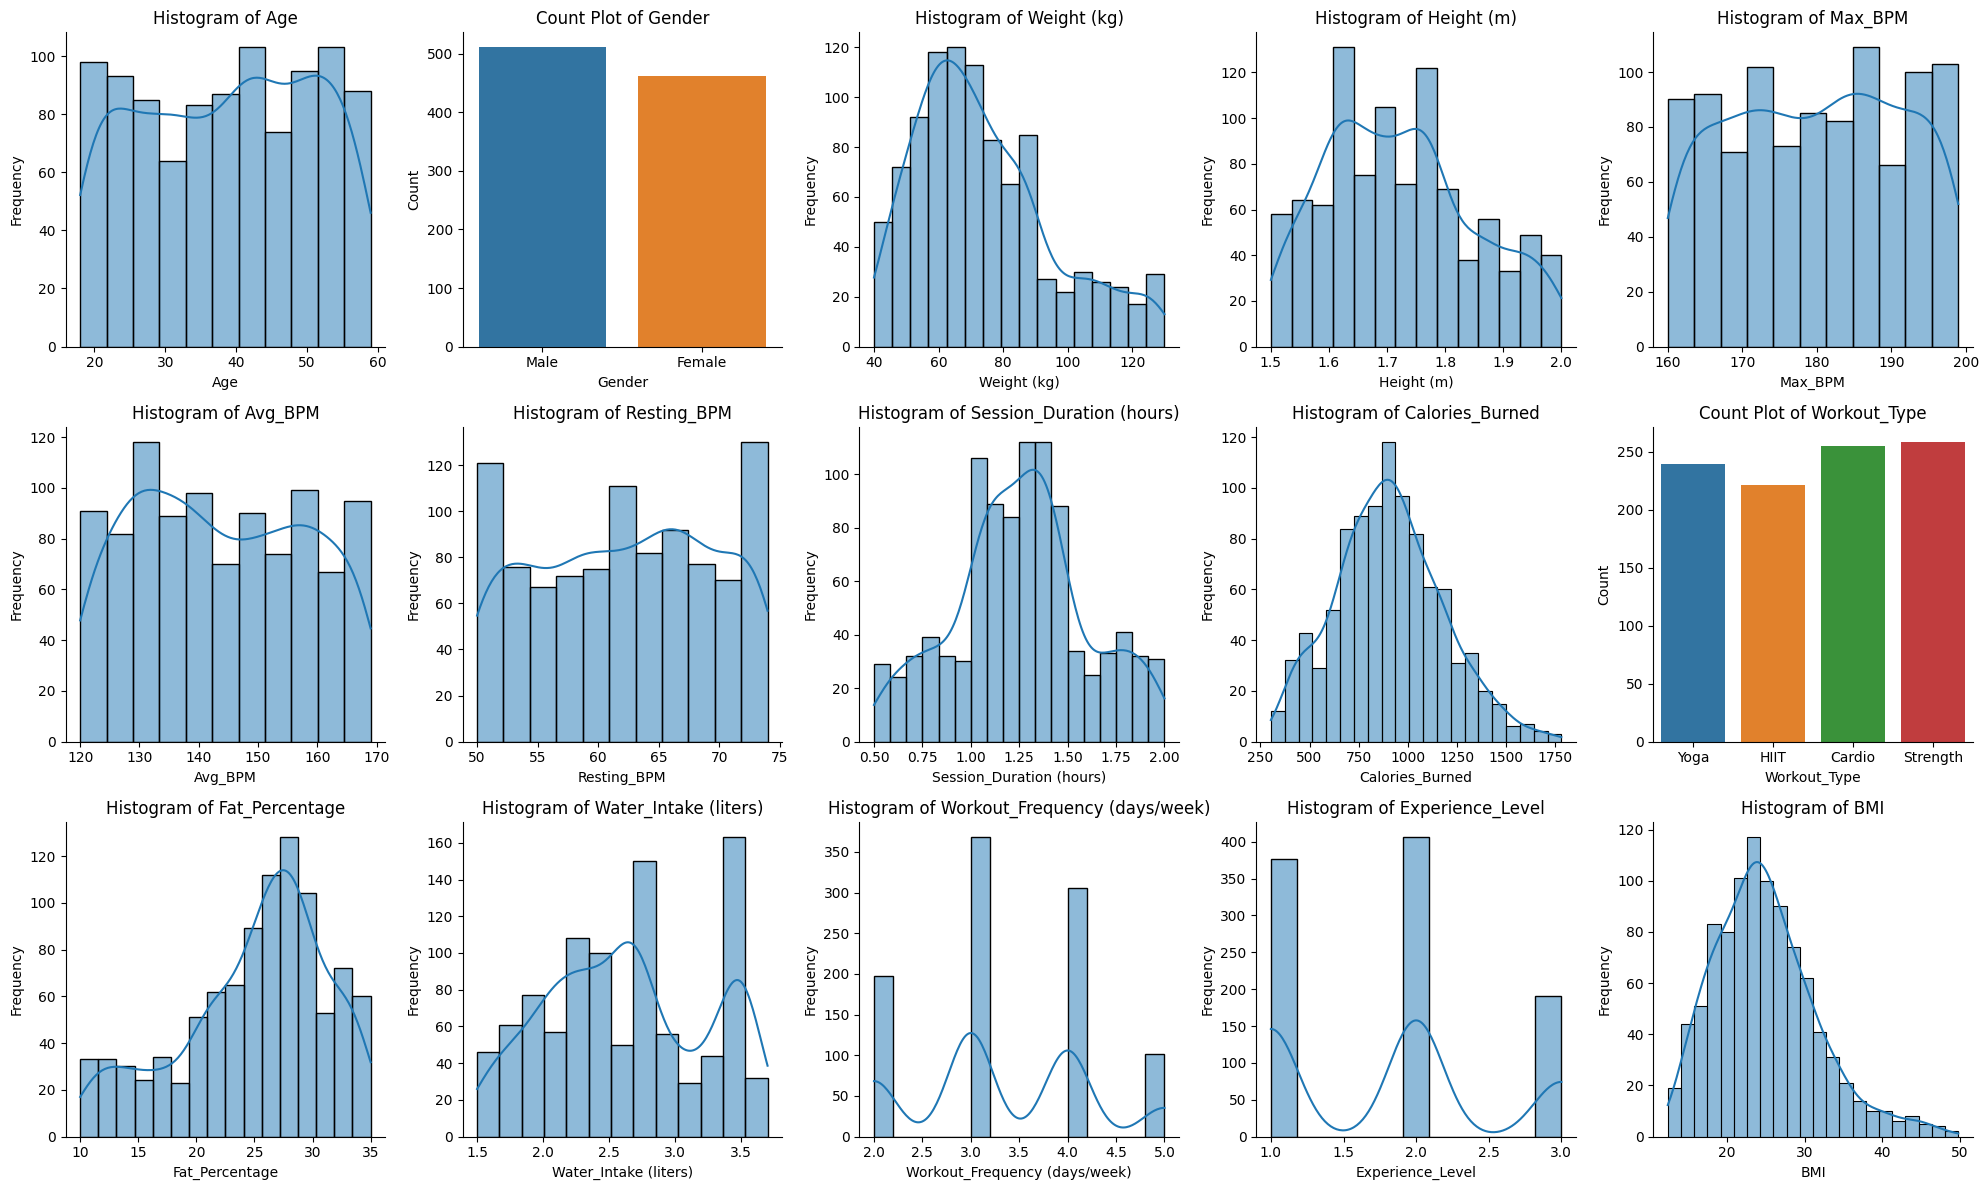

In [68]:
#Exploring all the columns: Creating a plot for each of the variables (Histogram for numeric variables and Countplot for Categorical Variables)

# Explicitly replace infinite values with NaN, then drop rows with NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Define the number of charts per row
charts_per_row = 5

# Calculate the number of rows needed based on the number of columns
num_columns = len(df.columns)
num_rows = math.ceil(num_columns / charts_per_row)

# Set up the figure size dynamically
fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(20, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and plot on the appropriate subplot
for i, column in enumerate(df.columns):
    if df[column].dtype in ['int64', 'float64']:
        # Plot histogram for numerical columns
        sns.histplot(df[column], kde=True, ax=axes[i])
        sns.despine()
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    else:
        # Plot count plot for categorical columns
        sns.countplot(x=df[column], ax=axes[i])
        sns.despine()
        axes[i].set_title(f'Count Plot of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()

### 4.2 Key Findings from EDA
After visualizing the data, we summarize key observations that help shape our understanding of the gym members’ demographics and workout habits:
1. **Age**: The age distribution appears relatively uniform, indicating a balanced representation across different age groups.
2. **Gender**: There is a slight male bias, with slightly more males than females in the dataset.
3. **Weight and Height**: The weight distribution is right-skewed, meaning more people have lower body weights, while height shows a roughly uniform distribution.
4. **Max, Avg, and Resting BPM**: These metrics show uniform distributions within their respective ranges, suggesting consistent cardiovascular activity among members.
5. **Session Duration and Calories Burned**: Both variables are right-skewed, indicating that most members engage in shorter sessions and burn fewer calories.
6. **Workout Type**: The frequency of different workout types (Yoga, HIIT, Cardio, Strength) is balanced, showing no significant preference for any particular workout.
7. **Fat Percentage and BMI**: These metrics are moderately skewed to the right, meaning a majority of members have values within the lower ranges, which may suggest a fitness-oriented dataset.

These findings offer a high-level view of the gym members’ physical and behavioral profiles, laying the groundwork for more detailed analyses.
the individuals in the dataset.


### 4.3 Demographic & Behavioral Patterns
To gain deeper insights into demographic and behavioral patterns, we analyze various relationships among variables:

- **Workout Type by Gender**: The distribution across workout types (Yoga, HIIT, Cardio, and Strength) is fairly balanced between genders, though males slightly dominate each workout type. This suggests that workout preferences are relatively uniform across genders.

- **Age by Workout Type**: The age distribution across workout types shows no significant differences, with each workout type having a broad age range centered around the 30-50 years range. This indicates that no specific age group favors any particular workout type.

- **BMI by Age and Gender**: The scatter plot of BMI by age and gender shows that BMI values for both genders are clustered between 20 and 30. The distribution is fairly consistent across different ages, with males displaying a slightly wider range of BMI values than females.

- **BMI by Workout Frequency**: Higher workout frequencies are associated with lower BMI values, especially for females, who tend to have consistently lower BMI values across all frequencies. This may suggest a correlation between regular exercise and lower BMI, particularly among women.

- **BMI by Experience Level**: BMI tends to decrease as experience level increases, with advanced members having notably lower BMI values. Males show a wider range of BMI at lower experience levels, while advanced members in both genders generally fall within a lower BMI range.

- **Fat Percentage by Workout Type**: Females consistently have higher fat percentages across all workout types compared to males. However, there is no significant variation in fat percentage based on workout type itself, suggesting that other factors may be more influential in determining fat percentage.

- **Fat Percentage by Workout Frequency**: Higher workout frequency is associated with lower fat percentages, with females showing higher fat percentages than males across all frequencies. This trend supports the association between frequent exercise and lower fat percentage.

- **Fat Percentage by Experience Level**: As experience level increases, fat percentage decreases, with advanced members showing the lowest fat percentages in both genders. This trend highlights the impact of consistent exercise experience on body composition.



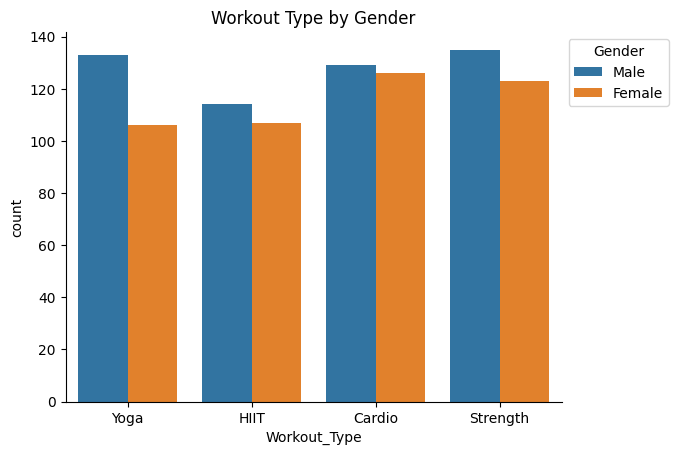


 Workout_Type  Gender
Cardio        Male      129
              Female    126
HIIT          Male      114
              Female    107
Strength      Male      135
              Female    123
Yoga          Male      133
              Female    106
Name: count, dtype: int64


In [69]:
# Demographic and Behavioral Analysis

# Creating table with count of participants by workout type and gender
workout_type_by_gender = df.groupby("Workout_Type")["Gender"].value_counts()

# Plotting workout type by gender 
sns.countplot(x="Workout_Type", hue="Gender", data=df)
sns.despine()
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1, 1))

plt.title('Workout Type by Gender')
    
plt.show()

print("\n", workout_type_by_gender)

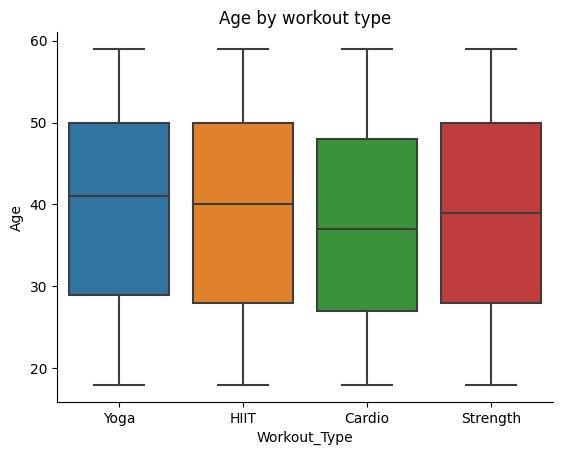

In [70]:
# Workout type by age

sns.boxplot(data=df, x="Workout_Type", y="Age")
sns.despine()

plt.title("Age by workout type")
plt.xlabel="Workout Type"
plt.ylabel="Age"
plt.show()

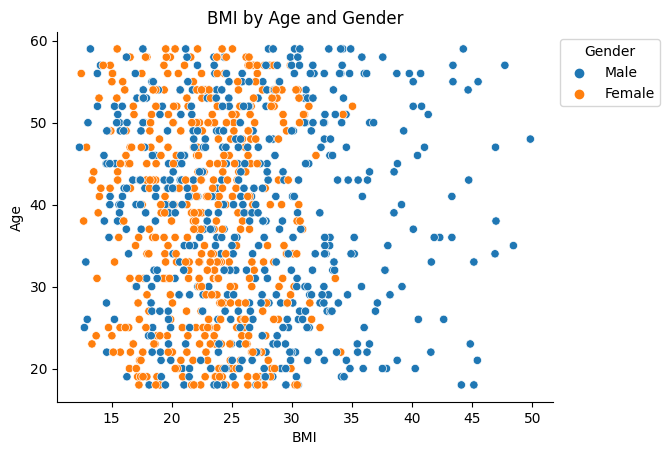

In [90]:
# BMI by Age and Gender

sns.scatterplot(data=df, x="BMI", y="Age", hue="Gender")
sns.despine()
plt.title("BMI by Age and Gender")

plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1, 1))



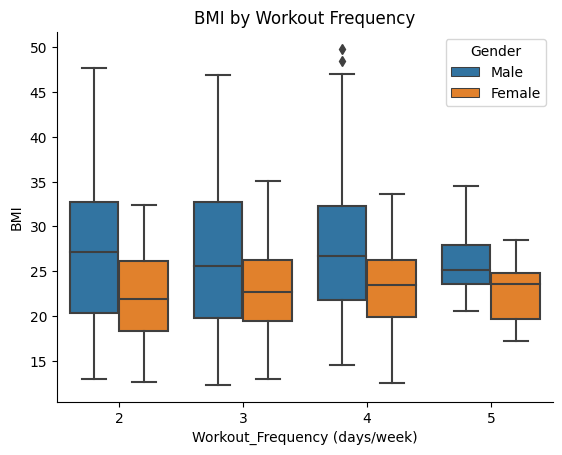

In [72]:
# BMI by Workout Frequency

sns.boxplot(data=df, x="Workout_Frequency (days/week)", y="BMI", hue="Gender")
sns.despine()

plt.title("BMI by Workout Frequency")
plt.xlabel="Workout Frequency (days/week)"
plt.ylabel="BMI"
plt.show()

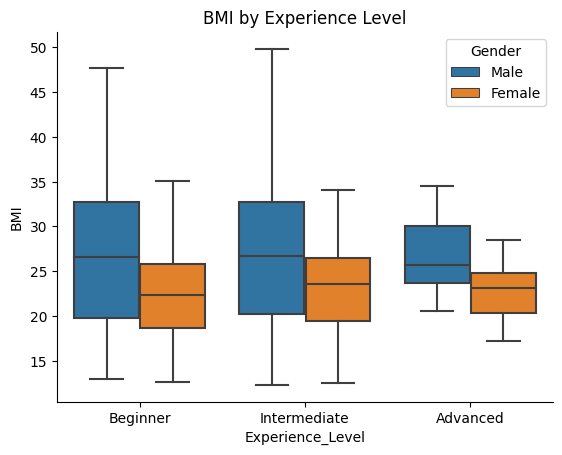

In [73]:
# BMI by experience level

sns.boxplot(data=df, x="Experience_Level", y="BMI", hue="Gender")
sns.despine()

plt.title("BMI by Experience Level")
plt.xlabel="Experience Level"
plt.ylabel="BMI"

# Replace x-axis labels 1, 2, 3 with experience level descriptions
plt.xticks([0, 1, 2], ['Beginner', 'Intermediate', 'Advanced'])

plt.show()

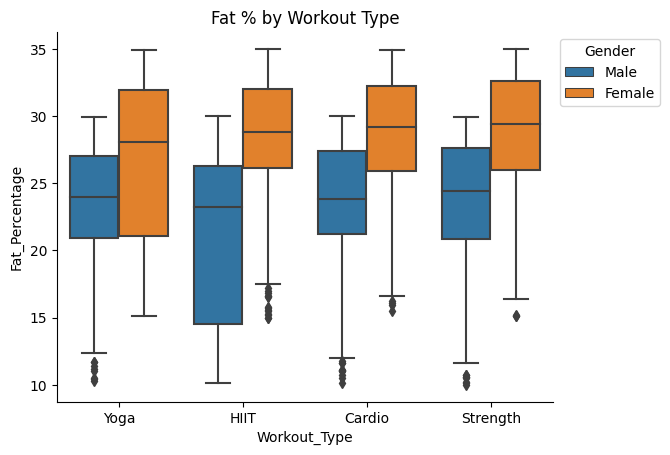

In [74]:
# Fat % by Workout Type

sns.boxplot(data=df, x="Workout_Type", y="Fat_Percentage", hue="Gender")
sns.despine()

plt.title("Fat % by Workout Type")
plt.xlabel="Workout Type"
plt.ylabel="Fat %"
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

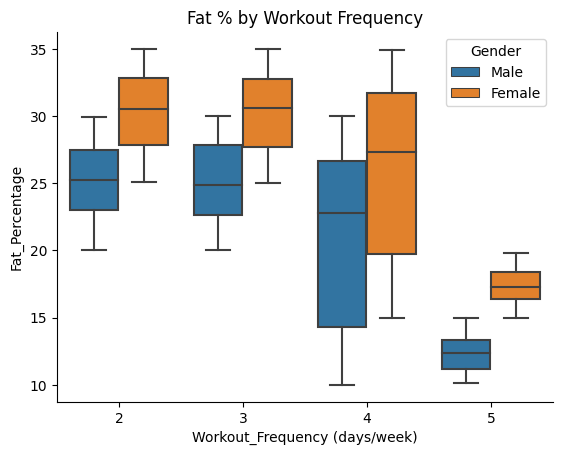

In [75]:
# Fat % by Workout Frequency

sns.boxplot(data=df, x="Workout_Frequency (days/week)", y="Fat_Percentage", hue="Gender")
sns.despine()

plt.title("Fat % by Workout Frequency")
plt.xlabel="Workout Frequency (days/week)"
plt.ylabel="BMI"
plt.show()



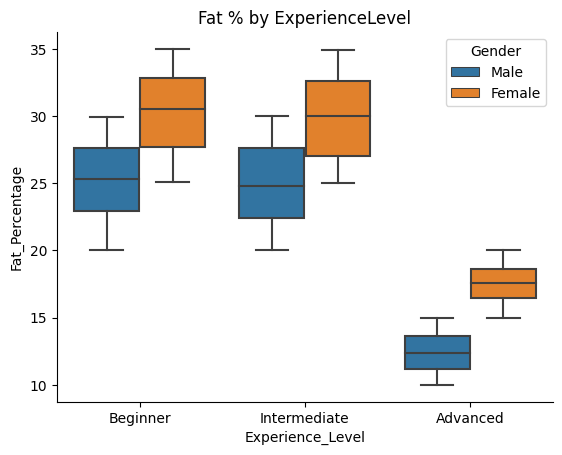

In [76]:
# Fat % by Experience Level

sns.boxplot(data=df, x="Experience_Level", y="Fat_Percentage", hue="Gender")
sns.despine()

plt.title("Fat % by ExperienceLevel")
plt.xlabel="Experience_Level"
plt.ylabel="Fat %"

# Replace x-axis labels 1, 2, 3 with experience level descriptions
plt.xticks([0, 1, 2], ['Beginner', 'Intermediate', 'Advanced'])

plt.show()

### 4.3 Summary of EDA Insights
From the EDA, we can draw several key conclusions:
1. **Balanced Demographics**: The dataset contains a balanced mix of workout types and experience levels across genders, which enables us to make generalizable observations about gym members’ behaviors.
2. **Exercise Frequency and Body Composition**: There appears to be an inverse relationship between workout frequency and BMI/fat percentage, especially for females. This suggests that regular exercise may contribute to lower BMI and fat percentage.
3. **Impact of Experience Level**: Advanced members tend to have lower BMI and fat percentages, indicating that experience level may play a significant role in achieving certain body composition metrics.
4. **Gender Differences**: While males and females participate similarly across workout types, females generally exhibit higher fat percentages. Gender-specific trends are observed across several metrics, hinting at potential physiological differences.

These insights will inform further analyses, including predictive modeling and statistical testing, to validate and quantify these observed patterns.

## 6. Predictive Analysis

### 6.1 Approach
To determine the key predictors of fat percentage, we use a **linear regression** approach. Each feature (e.g., Experience Level, Session Duration, Water Intake) is tested as an independent variable, with fat percentage as the dependent variable. By calculating the R-squared value for each feature, we rank them based on their predictive power. The dataset is split into training and test sets (70% training, 30% testing) to evaluate model performance and ensure reliable insights.osition.


In [79]:
# Rename columns to remove special characters and spaces
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')

# Check the updated columns
print(df.columns)

Index(['Age', 'Gender', 'Weight_kg', 'Height_m', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration_hours', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake_liters',
       'Workout_Frequency_daysweek', 'Experience_Level', 'BMI'],
      dtype='object')


### Top 5 Predictors of Fat Percentage Using Linear Regression:
In this analysis, we are going to determine the top 5 features that best predict **Fat Percentage** by using a linear regression approach. Here's a summary of the steps we will follow:

1. **Feature Selection**: We exclude the target variable (`Fat_Percentage`) and other irrelevant features (`BMI`) to focus on potential predictors.
2. **Linear Regression**: For each feature, we fit a linear regression model using the `statsmodels` library, where **Fat Percentage** is the dependent variable, and the selected feature is the independent variable.
3. **Train/Test Split**: We split the dataset into training (70%) and testing (30%) sets for each model to ensure that the performance is evaluated on unseen data.
4. **R-Squared Calculation**: After training the model, we make predictions on the test set and calculate the **R-squared score** for each feature. This score represents how well the model's predictions align with the actual values of Fat Percentage.
5. **Ranking Features**: The R-squared scores for each feature are stored and then sorted to identify the top 5 features that best predict Fat Perce needed for better predictions.


In [80]:
# Initialize a list to track features and their R-squared values
results = []

# Include Experience_Level as a relevant feature, assuming columns are cleaned
features = df.columns.drop(["Fat_Percentage", "BMI"])

# Loop through each feature and fit the linear regression model
for feature in features:
    # Define the formula for linear regression
    formula = f'Fat_Percentage ~ {feature}'
    
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
    
    # Fit the linear regression model
    model = smf.ols(formula=formula, data=train_data).fit()
    
    # Make predictions on the test set
    test_data['pred'] = model.predict(test_data)
    
    # Calculate R-squared score
    r2 = r2_score(test_data['Fat_Percentage'], test_data['pred'])
    
    # Append the feature and its R-squared value to the results list
    results.append((feature, r2))

# Convert the results into a DataFrame and sort by R-squared in descending order
results_df = pd.DataFrame(results, columns=["Feature", "R_squared"]).sort_values(by="R_squared", ascending=False)

# Print out the top 5 features
top_5_features = results_df.head()
print("Top 5 predictors for Fat_Percentage:")
print(top_5_features)

Top 5 predictors for Fat_Percentage:
                       Feature  R_squared
12            Experience_Level   0.396373
10         Water_Intake_liters   0.371087
7       Session_Duration_hours   0.356421
8              Calories_Burned   0.336511
11  Workout_Frequency_daysweek   0.267953


### 6.2 Insights
The analysis reveals that the top predictors of fat percentage are **Experience Level**, **Water Intake**, **Session Duration**, **Calories Burned**, and **Workout Frequency**. Experience Level is the strongest predictor, with advanced members showing significantly lower fat percentages. Higher water intake, longer workout durations, and frequent, intense workouts are all linked to lower fat levels. These findings suggest that **consistent training, hydration, and longer, intense sessions** play essential roles in achieving lower body fat.







### Results:
The top 5 predictors for **Fat Percentage** are:

| Feature                        | R_squared |
|---------------------------------|-----------|
| Experience_Level                | 0.396373  |
| Water_Intake_liters             | 0.371087  |
| Session_Duration_hours          | 0.351421  |
| Calories_Burned                 | 0.336531  |
| Workout_Frequency_daysweek      | 0.267953  |

- **Experience_Level** was the best predictor, explaining about 39.6% of the variance in Fat Percentage.
- **Water Intake (liters)** and **Session Duration (hours)** also showed strong predictive power with R-squared values of 0.37 and 0.35, respectively.
- Other notable predictors include **Calories Burned** and **Workout Frequency (days/week)**, which contributed to the prediction with R-squared values around 0.33 and 0.27.

Overall, these features provide a reasonable explanation for variations in Fat Percentage, although a more complex model may be needed for better predictions.


## 7. Statistical Analysis of Experience Levels

In this section, we analyze whether **Experience Level** (Beginner, Intermediate, Advanced) significantly impacts fat percentage. By applying statistical tests, we aim to understand if fat percentage differences among experience levels are statistically significant.

### 7.1 Approach
To assess differences in fat percentage across experience levels, we follow these steps:
1. **Normality Test (Shapiro-Wilk)**: First, we check if fat percentage values within each experience level are normally distributed. The Shapiro-Wilk test reveals that fat percentage distributions deviate from normality across all experience levels, necessitating a non-parametric approach.
2. **Kruskal-Wallis Test**: Since the data is non-normally distributed, we use the Kruskal-Wallis test, a non-parametric alternative to ANOVA, to evaluate if there are significant differences in fat percentage among the three experience levels.



In [81]:
df[['Fat_Percentage','Experience_Level']].isnull().sum()

Fat_Percentage      0
Experience_Level    0
dtype: int64

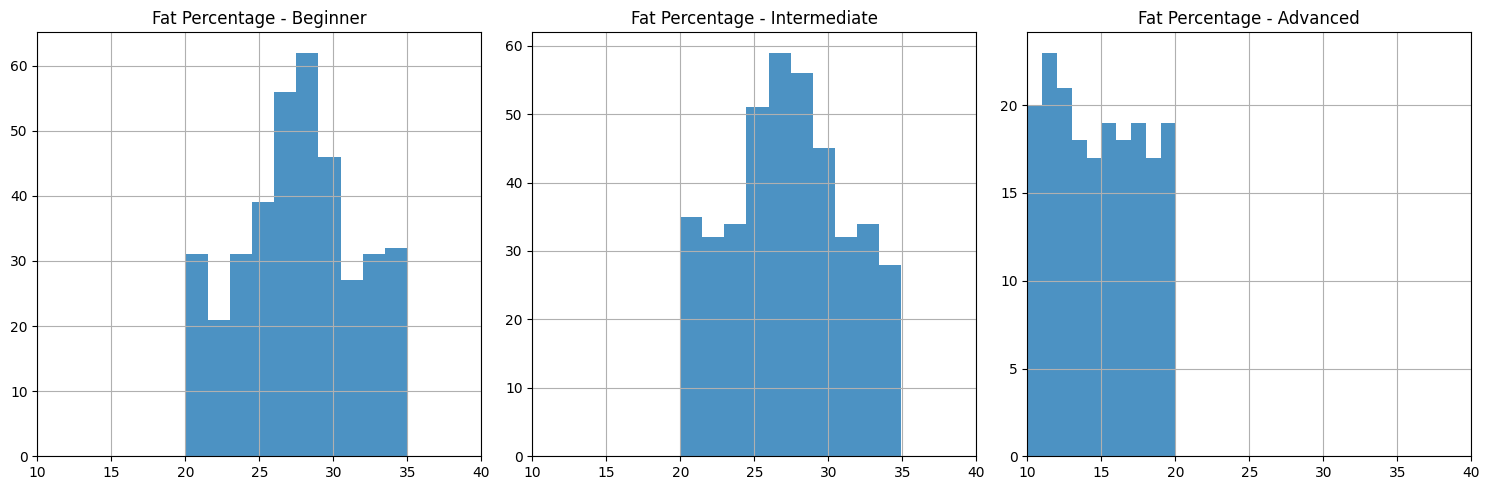

In [82]:
# Data for each experience level
Begginer = df[df["Experience_Level"] == 1]["Fat_Percentage"]
Intermediate = df[df["Experience_Level"] == 2]["Fat_Percentage"]
Advanced = df[df["Experience_Level"] == 3]["Fat_Percentage"]

# Define the x-axis limits
x_min, x_max = 10, 40  # Adjust these values as per your data range

# Plotting each distribution separately with the same x-axis limits
plt.figure(figsize=(15, 5))

# Beginner
plt.subplot(1, 3, 1)
Begginer.hist(alpha=0.8)
plt.title("Fat Percentage - Beginner")
plt.xlim(x_min, x_max)

# Intermediate
plt.subplot(1, 3, 2)
Intermediate.hist(alpha=0.8)
plt.title("Fat Percentage - Intermediate")
plt.xlim(x_min, x_max)

# Advanced
plt.subplot(1, 3, 3)
Advanced.hist(alpha=0.8)
plt.title("Fat Percentage - Advanced")
plt.xlim(x_min, x_max)


plt.tight_layout()
plt.show()

In [83]:
# Performing Shaphiro test to check normality
from scipy.stats import shapiro

experience_levels = df['Experience_Level'].unique()
for level in experience_levels:
    # Filter data for each experience level
    data = df[df['Experience_Level'] == level]['Fat_Percentage']
    
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data)
    print(f"Experience Level: {level}, p-value: {p_value}")

Experience Level: 3, p-value: 2.9629521118033488e-06
Experience Level: 2, p-value: 4.000447713189815e-06
Experience Level: 1, p-value: 1.018916623589412e-05


None of the experience levels fat percentages are normally distributed so we won't be able to perform an ANOVA test as it assumes normality in the groups, thats why we will perform the non parametrical Kruskal Wallis Test

In [84]:
from scipy.stats import kruskal

beginner = df[df['Experience_Level'] == 1]['Fat_Percentage']
intermediate = df[df['Experience_Level'] == 2]['Fat_Percentage']
advanced = df[df['Experience_Level'] == 3]['Fat_Percentage']

# Perform Kruskal-Wallis test 

stat, p_value = kruskal(beginner, intermediate, advanced)

print(f"Kruskal-Wallis test p-value: {p_value}")


Kruskal-Wallis test p-value: 7.953747623364504e-101


### 7.2 Results and Interpretation
The Kruskal-Wallis test results show a **significant difference** in fat percentage across experience levels (p-value < 0.05), indicating that experience level is an important factor. To determine which groups differ specifically, we perform post-hoc pairwise comparisons.


#### What This Means:
- The Kruskal-Wallis test p-value is extremely small (essentially close to zero), indicating **strong evidence against the null hypothesis**.
- The null hypothesis for the Kruskal-Wallis test is that the distributions of `Fat_Percentage` are identical across the different experience levels (Beginner, Intermediate, and Advanced).
- Since the p-value is far below a typical significance level (e.g., 0.05), we **reject the null hypothesis**. 

#### Conclusion:
- There is a **statistically significant difference** in `Fat_Percentage` among the three experience levels.
- This result suggests that at least one experience level group differs significantly in terms of `Fat_Percentage` compared to the others.
  
To identify which specific groups differ from each other, a **post-hoc test** (like the Mann-Whitney U test with Bonferroni correction) should be performed for pairwise comparisons.


### 7.3 Post-Hoc Analysis (Mann-Whitney U Test)
Using the Mann-Whitney U test with a Bonferroni correction for multiple comparisons, we examine differences between pairs of experience levels:
- **Beginner vs. Intermediate**: No significant difference in fat percentage.
- **Beginner vs. Advanced**: Significant difference, with Advanced members having lower fat percentages.
- **Intermediate vs. Advanced**: Significant difference, with Advanced members again showing lower fat percentages.

In [92]:
from scipy.stats import mannwhitneyu

# Extract data for each experience level
beginner = df[df['Experience_Level'] == 1]['Fat_Percentage']
intermediate = df[df['Experience_Level'] == 2]['Fat_Percentage']
advanced = df[df['Experience_Level'] == 3]['Fat_Percentage']

# List of groups for pairwise comparisons
groups = [('Beginner', beginner), ('Intermediate', intermediate), ('Advanced', advanced)]
comparisons = []

# Perform Mann-Whitney U Test for each pair of groups with Bonferroni correction
alpha = 0.05 / 3  # Bonferroni correction for 3 comparisons

# Loop through each pair of groups
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1_name, group1_data = groups[i]
        group2_name, group2_data = groups[j]
        
        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(group1_data, group2_data)
        
        # Apply Bonferroni correction and store results
        comparisons.append({
            'Comparison': f"{group1_name} vs {group2_name}",
            'Mann-Whitney U p-value': p_value,
            'Bonferroni corrected p-value': p_value * 3  # Adjusted for multiple comparisons
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(comparisons)
results_df

,Comparison,Mann-Whitney U p-value,Bonferroni corrected p-value
0,Beginner vs Intermediate,2.315116e-01,6.945349e-01
1,Beginner vs Advanced,1.772316e-84,5.316947e-84
2,Intermediate vs Advanced,1.350665e-86,4.051996e-86


### 7.4 Summary
The statistical analysis indicates that **Advanced members have significantly lower fat percentages** compared to Beginner and Intermediate members, while there is no significant difference between Beginners and Intermediates. This suggests that progressing to an advanced level may be associated with improved body composition, possibly due to increased exercise consistency, intensity, or workout optimization.

- **Beginner vs. Intermediate:**
  - Bonferroni-corrected p-value: ~0.6945
  - Interpretation: No statistically significant difference in `Fat_Percentage` between Beginner and Intermediate groups (p > 0.05).

- **Beginner vs. Advanced:**
  - Bonferroni-corrected p-value: ~5.32e-84
  - Interpretation: Statistically significant difference in `Fat_Percentage` between Beginner and Advanced groups (p < 0.05).

- **Intermediate vs. Advanced:**
  - Bonferroni-corrected p-value: ~4.05e-86
  - Interpretation: Statistically significant difference in `Fat_Percentage` between Intermediate and Advanced groups (p < 0.05).

### Summary
- There is a significant difference in `Fat_Percentage` between the Advanced group and both the Beginner and Intermediate groups.
- There is **no significant difference** in `Fat_Percentage` between the Beginner and Intermediate groups.


## 8. Conclusion

This analysis provides valuable insights into the factors influencing body composition among gym members, particularly in relation to fat percentage. By examining demographic, behavioral, and experience-level data, we identified trends, predictors, and significant differences that can inform fitness strategies.

### 8.1 Key Findings
1. **Predictors of Fat Percentage**: Linear regression analysis highlighted **Experience Level**, **Water Intake**, **Session Duration**, **Calories Burned**, and **Workout Frequency** as the top predictors of fat percentage. Advanced members, those who stay well-hydrated, exercise more frequently, and engage in longer, higher-calorie-burning workouts tend to have lower body fat levels.
2. **Impact of Experience Level**: Statistical testing confirmed that **Advanced members** have significantly lower fat percentages than Beginners and Intermediates, underscoring the role of experience and consistent training in achieving improved body composition.
3. **Demographic Patterns**: Females generally show higher fat percentages than males across all workout types and frequencies, while higher workout frequency and experience level are associated with better body composition outcomes for both genders.

### 8.2 Limitations
- **Data Scope**: The dataset does not include other lifestyle factors (e.g., diet, sleep, stress) that could also influence body composition, limiting the ability to build a comprehensive model of fat percentage predictors.
- **Linear Model Limitations**: Our use of linear regression may not capture complex, non-linear relationships between variables, which could provide additional insights if explored.

### 8.3 Recommendations
Based on these findings, we suggest the following for gym members looking to improve body composition:
- **Increase Workout Consistency and Duration**: Regular, longer workouts are strongly associated with lower fat percentages.
- **Focus on Progression**: Advancing through experience levels appears beneficial, indicating that gradual increases in intensity and workout complexity may lead to better body composition.
- **Maintain Hydration**: Higher water intake correlates with lower fat percentages, suggesting that hydration should be a part of any fitness regimen.

### 8.4 Future Analysis
To expand on this analysis, future research could:
- Include additional lifestyle factors (diet, sleep) to develop a more comprehensive model.
- Use advanced modeling techniques (e.g., non-linear regression, machine learning) to capture complex interactions between predictors.

This study emphasizes the importance of consistent, quality training, hydration, and progressive fitness routines in achieving favorable body composition. By focusing on these factors, gym members can make informed decisions to improve their health and fitness outcomes.
